## 1- Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [58]:
df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [59]:
states=df.interpolate()

In [60]:
states.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      0
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              1
dtype: int64

In [61]:
states['OTHER_EXPENDITURE'] = states['OTHER_EXPENDITURE'].fillna(states['OTHER_EXPENDITURE'].mean())
states['AVG_READING_8_SCORE'] = states['AVG_READING_8_SCORE'].fillna(states['AVG_READING_8_SCORE'].mean())

In [62]:
states.isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE                0
CAPITAL_OUTLAY_EXPENDITURE       0
GRADES_PK_G                      0
GRADES_KG_G                      0
GRADES_4_G                       0
GRADES_8_G                       0
GRADES_12_G                      0
GRADES_1_8_G                     0
GRADES_9_12_G                    0
GRADES_ALL_G                     0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

## AĞIRLIKLI ORTALAMA DEĞİŞKENİMİZİ OLUŞTURALIM

In [63]:
states["WEIGHTED_MEAN"]=(states["GRADES_4_G"]*states["AVG_MATH_4_SCORE"]+
                            states["GRADES_4_G"]*states["AVG_READING_4_SCORE"]+
                            states["GRADES_8_G"]*states["AVG_MATH_8_SCORE"]+
                            states["GRADES_8_G"]*states["AVG_READING_8_SCORE"])/(
                            2*(states["GRADES_4_G"]+states["GRADES_8_G"]))

## 2 - Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [64]:
states = states.iloc[:,8:26]
states_cor = states.corr()
states_cor

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,WEIGHTED_MEAN
TOTAL_EXPENDITURE,1.000000,0.991764,0.993606,0.943447,0.930113,0.691185,0.840899,0.843383,0.854937,0.881592,0.845230,0.870889,0.837479,0.135248,0.122059,0.070351,0.107089,0.142218
INSTRUCTION_EXPENDITURE,0.991764,1.000000,0.978065,0.909288,0.894612,0.653265,0.809194,0.811850,0.823068,0.848287,0.813796,0.839170,0.805918,0.131763,0.120879,0.078098,0.111331,0.143507
SUPPORT_SERVICES_EXPENDITURE,0.993606,0.978065,1.000000,0.949845,0.915145,0.690270,0.844267,0.845720,0.857402,0.887700,0.847479,0.874034,0.837775,0.146539,0.133266,0.078317,0.114523,0.154018
OTHER_EXPENDITURE,0.943447,0.909288,0.949845,1.000000,0.912429,0.711919,0.881036,0.878685,0.887613,0.908481,0.880118,0.898794,0.866536,0.086212,0.082147,0.025698,0.097753,0.096729
CAPITAL_OUTLAY_EXPENDITURE,0.930113,0.894612,0.915145,0.912429,1.000000,0.743934,0.843272,0.850801,0.860915,0.868687,0.852258,0.869956,0.855178,0.110967,0.083085,0.020268,0.053638,0.090217
GRADES_PK_G,0.691185,0.653265,0.690270,0.711919,0.743934,1.000000,0.784868,0.788010,0.787246,0.754302,0.789495,0.775522,0.802538,0.036762,0.035452,-0.026280,0.106292,0.049326
GRADES_KG_G,0.840899,0.809194,0.844267,0.881036,0.843272,0.784868,1.000000,0.997503,0.995235,0.979355,0.997625,0.991949,0.978793,-0.092513,-0.054126,-0.106507,0.053667,-0.057245
GRADES_4_G,0.843383,0.811850,0.845720,0.878685,0.850801,0.788010,0.997503,1.000000,0.997912,0.979452,0.999750,0.993745,0.982926,-0.098979,-0.059001,-0.111167,0.044214,-0.064140
GRADES_8_G,0.854937,0.823068,0.857402,0.887613,0.860915,0.787246,0.995235,0.997912,1.000000,0.985658,0.998728,0.997539,0.983819,-0.084691,-0.049867,-0.103541,0.050561,-0.048229
GRADES_12_G,0.881592,0.848287,0.887700,0.908481,0.868687,0.754302,0.979355,0.979452,0.985658,1.000000,0.980486,0.994155,0.964654,-0.028740,-0.000217,-0.066044,0.079223,0.007885


Text(0.5, 1, 'Harcama Korelasyonu')

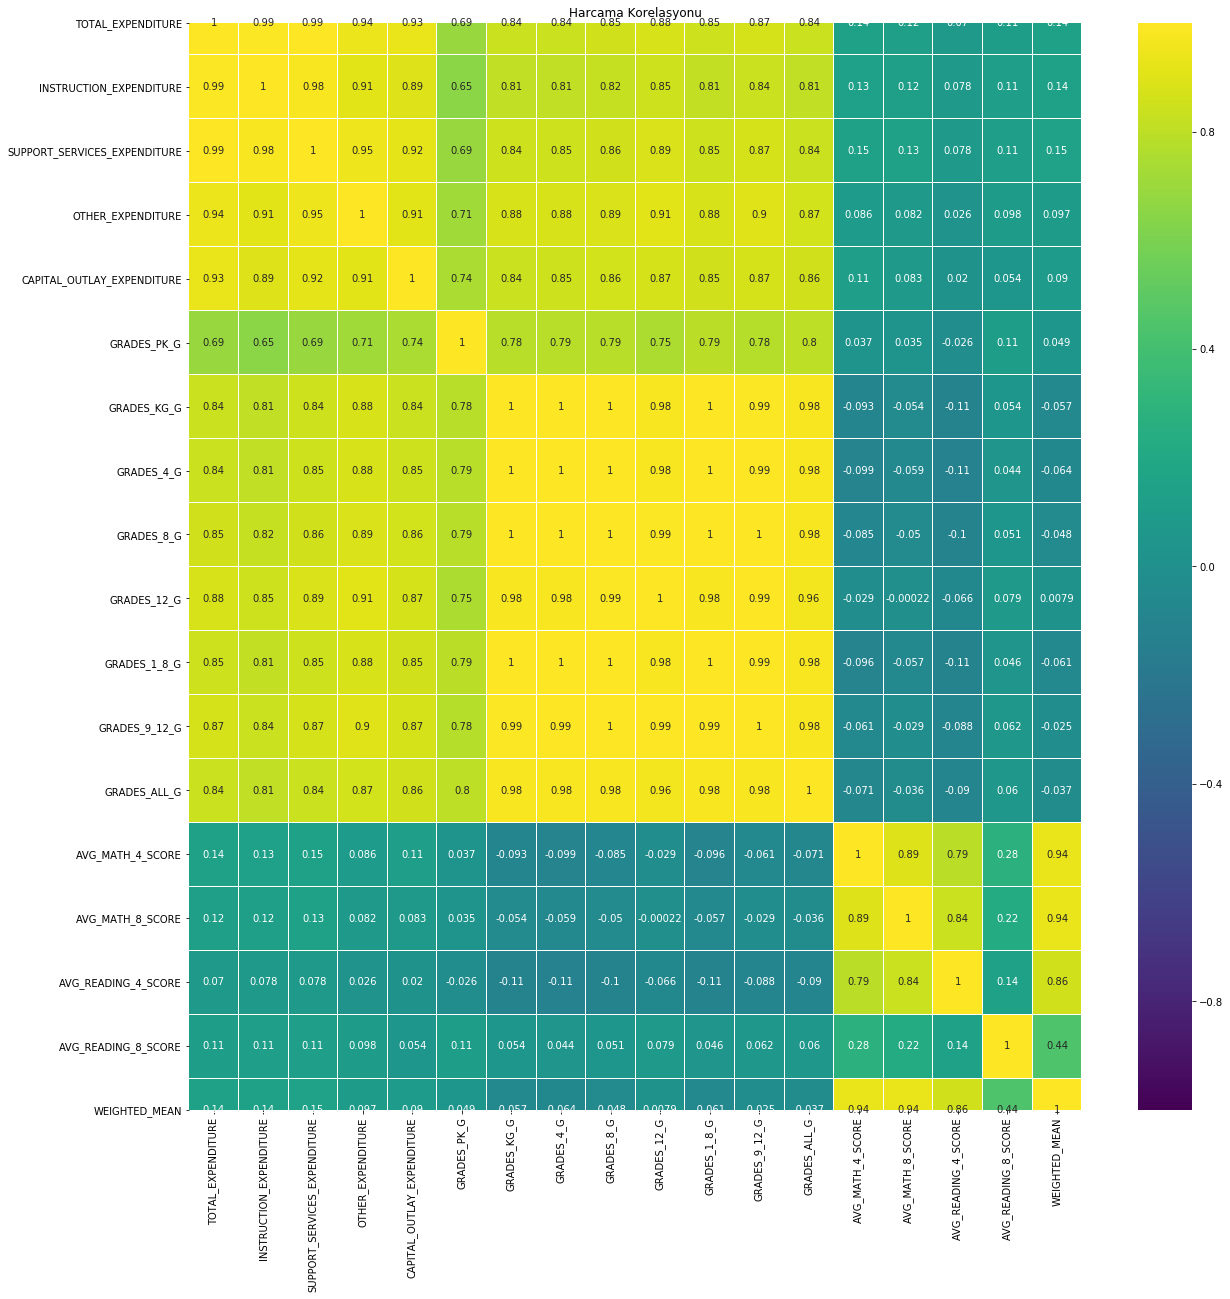

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(states_cor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.title("Harcama Korelasyonu")

# matplotlib versiyon düşürdüm ama hala üstten ve alttan kesiliyor :/

Korelasyon expenditure ile oldukça az

## 3- Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [66]:
pca = PCA(n_components=4)
pc = pca.fit_transform(states)
print (pca.explained_variance_ratio_)

[0.9928099  0.00426625 0.00161611 0.00105289]


In [67]:
## %99'u ilk bileşen ile açıklanmaktadır.

## 4- Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [69]:
korel=pd.DataFrame()
korel["WEIGHTED_MEAN"]=states["WEIGHTED_MEAN"]
korel["PC1"]=pd.DataFrame(pc)[0]
korel.corr()

,WEIGHTED_MEAN,PC1
WEIGHTED_MEAN,1.000000,0.141956
PC1,0.141956,1.000000


%14'tür

## 5- Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

İlk temel değişken datanın %99'unu açıklayabildiği için kesinlikle tercih ederdim.